_**Important Note**: This notebook is simply a series of notes I'm writing as I code along with the lecture videos. For a much more thorough explanation of what is discussed in the course lectures, check out the [official notebook](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-pandas.ipynb) for this section._

# Data Analysis using Pandas

[pandas](https://pandas.pydata.org/) is an open-source library which helps with data analysis and manipulation. It provides a simple to use yet powerful functions to handle various kinds of data. `pandas` is integrated with many other data science and machine learning Python tools, typically to transform the data into a format which is ready to be inputted to machine learning algorithms.

The very first thing we need to do when starting up the project is import the `pandas` library:

In [1]:
import pandas as pd

The above syntax simply "renames" `pandas` to `pd` so that we can have an easier time typing the whole name out when using `pandas`' various data analysis tools.

## Two Main Datatypes

`pandas` offers two data types: `Series` and `DataFrame`.

### Series

To create a new `Series` object, simply call the `pd.Series` function with the list of data to be stored in the `Series`:

In [2]:
series = pd.Series(["BMW", "Toyota", "Honda"])
type(series)

pandas.core.series.Series

In [3]:
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [4]:
colours = pd.Series(["Red", "Blue", "White"])
colours

0      Red
1     Blue
2    White
dtype: object

One thing to note about `Series` is that it's what's known as a *one-dimensional* object, meaning the data can have multiple rows but only one column of information (aside from the index numbers).

### DataFrame

Unlike `Series`, `DataFrame` objects are known as a *two-dimensional* object, meaning it can have multiple columns of information. `DataFrame`s are much more commonly used than `Series` simply because most real-world data contain multiple features which means they require multiples of information which is exactly what `DataFrame`s are best suited for.

To create a new `DataFrame` object, use the `pd.DataFrame` function with a dictionary that contains the information to be stored in the `DataFrame`. You can even create a `DataFrame` out of multiple `Series` objects:

In [5]:
car_data = pd.DataFrame({"Car make": series, "Colour": colours})
type(car_data)

pandas.core.frame.DataFrame

In [6]:
car_data

,Car make,Colour
0,BMW,Red
1,Toyota,Blue
2,Honda,White


## Importing Data

You might start to notice that creating `Series` and `DataFrame` objects from scratch would get rather tedious especially when handling large amounts of data. Luckily, most real-world data are typically already neatly stored in separate files such as spreadsheets.

With `pandas`, you can easily use those spreadsheets and convert them into workable objects by importing the spreadsheet data. For example, the `pd.read_csv` function can import data from `.csv` spreadsheets:

In [7]:
car_sales = pd.read_csv("../data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


As you can see, importing data using `pd.read_csv` provides us with the spreadsheet data and stores it into a `DataFrame`. This means we can easily work with the imported data with the various data analysis tools that `pandas` has to offer!

## Anatomy of a DataFrame

![Anatomy of a DataFrame](./img/anatomy-of-a-dataframe.png)

## Exporting a DataFrame

You can also export `DataFrame`s into a separate file. The `to_csv` method exports a `DataFrame` into a `.csv` spreadsheet file. Alternatively, you can also use the `to_excel` method to export the `DataFrame` into an Excel spreadsheet instead.

In [8]:
car_sales.to_csv("exported_car_sales.csv")

And as usual, you can then import the file back into a `DataFrame`:

In [9]:
exported_car_sales = pd.read_csv("./exported_car_sales.csv")
exported_car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Toyota,White,150043,4,"$4,000.00"
1,1,Honda,Red,87899,4,"$5,000.00"
2,2,Toyota,Blue,32549,3,"$7,000.00"
3,3,BMW,Black,11179,5,"$22,000.00"
4,4,Nissan,White,213095,4,"$3,500.00"
5,5,Toyota,Green,99213,4,"$4,500.00"
6,6,Honda,Blue,45698,4,"$7,500.00"
7,7,Honda,Blue,54738,4,"$7,000.00"
8,8,Toyota,White,60000,4,"$6,250.00"
9,9,Nissan,White,31600,4,"$9,700.00"


Huh, that's weird... It seems that another column was added when the object was exported! That extra column was actually the index column that got included in the `.csv` file when the data got exported. Since `DataFrames` automatically creates an index column, we can omit it when we export to a separate file:

In [10]:
car_sales.to_csv("exported_car_sales_no_index.csv", index=False)

Verifying that the exported file does not have an extra index column:

In [11]:
exported_car_sales_no_index = pd.read_csv("./exported_car_sales_no_index.csv")
exported_car_sales_no_index

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


You can also import data from external URLs:

In [12]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Describe Data

In [13]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [14]:
car_columns = car_sales.columns
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [15]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [16]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [17]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [18]:
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [22]:
car_sales["Doors"].mean()

4.0

In [19]:
car_sales.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [21]:
car_sales["Doors"].sum()

40

In [23]:
len(car_sales)

10

## Viewing and Selecting Data

In [24]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [25]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [26]:
car_sales.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"


### `loc` and `iloc`

In [27]:
animals = pd.Series(["cat", "dog", "parrot", "panda", "fox"])
animals

0       cat
1       dog
2    parrot
3     panda
4       fox
dtype: object

In [28]:
animals = pd.Series(["cat", "dog", "parrot", "panda", "fox"], index=[0, 3, 9, 8, 3])
animals

0       cat
3       dog
9    parrot
8     panda
3       fox
dtype: object

`loc` refers to the index

In [29]:
animals.loc[3]

3    dog
3    fox
dtype: object

In [30]:
animals.loc[9]

'parrot'

Now let's go back to the `car_sales` example:

In [31]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [32]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

On the other hand, `iloc` refers to the position

In [33]:
animals.iloc[3]

'panda'

In [34]:
car_sales.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [35]:
animals.iloc[:3]

0       cat
3       dog
9    parrot
dtype: object

In [36]:
car_sales.iloc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


### Accessing columns within a DataFrame

In [37]:
car_sales["Make"]

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [38]:
car_sales.Make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [39]:
car_sales["Odometer (KM)"]

0    150043
1     87899
2     32549
3     11179
4    213095
5     99213
6     45698
7     54738
8     60000
9     31600
Name: Odometer (KM), dtype: int64

In [40]:
car_sales[car_sales.Make == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [41]:
car_sales[car_sales["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [42]:
pd.crosstab(car_sales.Make, car_sales.Price)

Price,"$22,000.00","$3,500.00","$4,000.00","$4,500.00","$5,000.00","$6,250.00","$7,000.00","$7,500.00","$9,700.00"
Make,,,,,,,,,
BMW,1,0,0,0,0,0,0,0,0
Honda,0,0,0,0,1,0,1,1,0
Nissan,0,1,0,0,0,0,0,0,1
Toyota,0,0,1,1,0,1,1,0,0


In [43]:
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<AxesSubplot:>

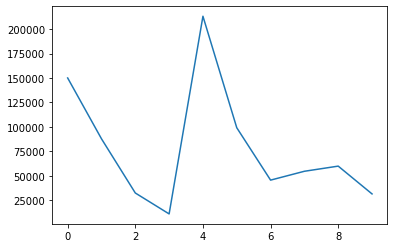

In [44]:
car_sales["Odometer (KM)"].plot()

<AxesSubplot:>

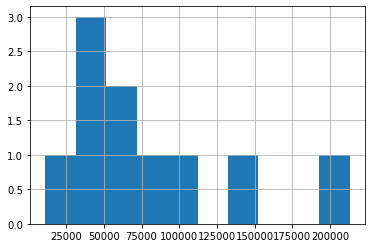

In [45]:
car_sales["Odometer (KM)"].hist()

In [46]:
car_sales.Price = car_sales.Price.str.replace("[\$\,]", "").astype(float)
car_sales

<ipython-input-46-c2c9d7938676>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales.Price = car_sales.Price.str.replace("[\$\,]", "").astype(float)


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


<AxesSubplot:>

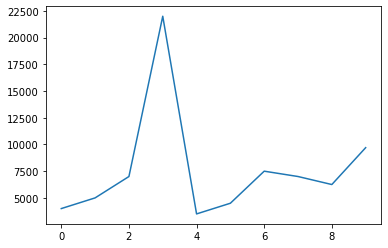

In [47]:
car_sales.Price.plot()

## Manipulating Data

In [48]:
car_sales.Make.str.upper()

0    TOYOTA
1     HONDA
2    TOYOTA
3       BMW
4    NISSAN
5    TOYOTA
6     HONDA
7     HONDA
8    TOYOTA
9    NISSAN
Name: Make, dtype: object

In [49]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [50]:
car_sales_missing = pd.read_csv("../data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [51]:
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean())

0    150043.000000
1     87899.000000
2     92302.666667
3     11179.000000
4    213095.000000
5     92302.666667
6     92302.666667
7     92302.666667
8     60000.000000
9     31600.000000
Name: Odometer, dtype: float64

In [52]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [53]:
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), inplace=True)

In [54]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [55]:
car_sales_missing.dropna(inplace=True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [56]:
car_sales_missing = pd.read_csv("../data/car-sales-missing-data.csv")

In [57]:
car_sales_missing_dropped = car_sales_missing.dropna()
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [58]:
car_sales_missing_dropped.to_csv("exported_car_sales_missing_dropped.csv")

### Creating a new column

In [60]:
seats_column = pd.Series([5, 5, 5, 5, 5])

In [61]:
car_sales.Seats = seats_column

<ipython-input-61-7435494d2fbd>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  car_sales.Seats = seats_column


In [62]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [63]:
car_sales["Seats"] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000.0,5.0
1,Honda,Red,87899,4,5000.0,5.0
2,Toyota,Blue,32549,3,7000.0,5.0
3,BMW,Black,11179,5,22000.0,5.0
4,Nissan,White,213095,4,3500.0,5.0
5,Toyota,Green,99213,4,4500.0,NaN
6,Honda,Blue,45698,4,7500.0,NaN
7,Honda,Blue,54738,4,7000.0,NaN
8,Toyota,White,60000,4,6250.0,NaN
9,Nissan,White,31600,4,9700.0,NaN


In [65]:
car_sales["Seats"].fillna(5.0, inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000.0,5.0
1,Honda,Red,87899,4,5000.0,5.0
2,Toyota,Blue,32549,3,7000.0,5.0
3,BMW,Black,11179,5,22000.0,5.0
4,Nissan,White,213095,4,3500.0,5.0
5,Toyota,Green,99213,4,4500.0,5.0
6,Honda,Blue,45698,4,7500.0,5.0
7,Honda,Blue,54738,4,7000.0,5.0
8,Toyota,White,60000,4,6250.0,5.0
9,Nissan,White,31600,4,9700.0,5.0


You can also create a new column from a list:

In [67]:
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3.0, 4.5]
car_sales["Fuel (L) per 100km"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km
0,Toyota,White,150043,4,4000.0,5.0,7.5
1,Honda,Red,87899,4,5000.0,5.0,9.2
2,Toyota,Blue,32549,3,7000.0,5.0,5.0
3,BMW,Black,11179,5,22000.0,5.0,9.6
4,Nissan,White,213095,4,3500.0,5.0,8.7
5,Toyota,Green,99213,4,4500.0,5.0,4.7
6,Honda,Blue,45698,4,7500.0,5.0,7.6
7,Honda,Blue,54738,4,7000.0,5.0,8.7
8,Toyota,White,60000,4,6250.0,5.0,3.0
9,Nissan,White,31600,4,9700.0,5.0,4.5


> **CAUTION!** When creating a new column from a list, the list must have the same length as the DataFrame.

In [68]:
car_sales["Total fuel used (L)"] = car_sales["Odometer (KM)"] / 100 * car_sales["Fuel (L) per 100km"]
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L)
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000


You can even create a new column from just a single value:

In [69]:
car_sales["Number of wheels"] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4


In [70]:
car_sales["Passed road safety"] = True
car_sales.dtypes

Make                    object
Colour                  object
Odometer (KM)            int64
Doors                    int64
Price                  float64
Seats                  float64
Fuel (L) per 100km     float64
Total fuel used (L)    float64
Number of wheels         int64
Passed road safety        bool
dtype: object

### Deleting a column

In [71]:
car_sales["Passed road saftey"] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety,Passed road saftey
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True,True
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True,True
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True,True
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True,True
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True,True
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True,True
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True,True


In [73]:
car_sales.drop("Passed road saftey", axis=1, inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True


### Sampling data


In [74]:
car_sales.sample(frac=1)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True


In [75]:
car_sales.sample(frac=0.5)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True


In [77]:
car_sales_shuffled = car_sales.sample(frac=1)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True


In [78]:
car_sales_shuffled.reset_index(inplace=True)
car_sales_shuffled

,index,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety
0,2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
1,1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
2,6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
3,3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
4,5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
5,4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
6,9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True
7,7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
8,0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
9,8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True


In [79]:
car_sales_shuffled = car_sales.sample(frac=1)
car_sales_shuffled.reset_index(inplace=True, drop=True)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
1,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
2,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
3,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
4,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
5,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
6,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True
7,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
8,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
9,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True


Let's take another look at the `car_sales` dataframe:

In [80]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True


In [81]:
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda km: km / 1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,93776.875,4,4000.0,5.0,7.5,11253.225,4,True
1,Honda,Red,54936.875,4,5000.0,5.0,9.2,8086.708,4,True
2,Toyota,Blue,20343.125,3,7000.0,5.0,5.0,1627.450,4,True
3,BMW,Black,6986.875,5,22000.0,5.0,9.6,1073.184,4,True
4,Nissan,White,133184.375,4,3500.0,5.0,8.7,18539.265,4,True
5,Toyota,Green,62008.125,4,4500.0,5.0,4.7,4663.011,4,True
6,Honda,Blue,28561.250,4,7500.0,5.0,7.6,3473.048,4,True
7,Honda,Blue,34211.250,4,7000.0,5.0,8.7,4762.206,4,True
8,Toyota,White,37500.000,4,6250.0,5.0,3.0,1800.000,4,True
9,Nissan,White,19750.000,4,9700.0,5.0,4.5,1422.000,4,True


In [84]:
car_sales.rename(columns={"Odometer (KM)": "Odometer (mi)"}, inplace=True)
car_sales

,Make,Colour,Odometer (mi),Doors,Price,Seats,Fuel (L) per 100km,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,93776.875,4,4000.0,5.0,7.5,11253.225,4,True
1,Honda,Red,54936.875,4,5000.0,5.0,9.2,8086.708,4,True
2,Toyota,Blue,20343.125,3,7000.0,5.0,5.0,1627.450,4,True
3,BMW,Black,6986.875,5,22000.0,5.0,9.6,1073.184,4,True
4,Nissan,White,133184.375,4,3500.0,5.0,8.7,18539.265,4,True
5,Toyota,Green,62008.125,4,4500.0,5.0,4.7,4663.011,4,True
6,Honda,Blue,28561.250,4,7500.0,5.0,7.6,3473.048,4,True
7,Honda,Blue,34211.250,4,7000.0,5.0,8.7,4762.206,4,True
8,Toyota,White,37500.000,4,6250.0,5.0,3.0,1800.000,4,True
9,Nissan,White,19750.000,4,9700.0,5.0,4.5,1422.000,4,True
